# Linear Regression with One Variable

In [1]:
%matplotlib inline
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

## load dataset

###### load shape : (m , n)

In [2]:
path = "dataset/ex1data1.txt"
ori_one_variable = np.loadtxt(path, delimiter=',')
print("> ori_one_variable.shape", ori_one_variable.shape)
print("\n> ori_one_variable[:5]\n", ori_one_variable[:5])

> ori_one_variable.shape (97, 2)

> ori_one_variable[:5]
 [[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]


## get ori Matrix-X, Vector-y

> + X_ori : (m, n)
> + y_ori : (m, )

In [3]:
def get_ori_X_y(ori, method=0):
    m = ori.shape[0]
    size = ori.shape[1]
    
    if method == 0:          # Python Slice [通用]
        X_ori = np.array(ori[:,:-1])
        y_ori = np.array(ori[:,-1:]).reshape((-1,))
    elif method == 1:        # np.reshape() [通用]
        X_ori = np.array(ori[:,:size-1]).reshape((-1,size-1))
        y_ori = np.array(ori[:,-1:]).reshape((-1,))
    elif method == 2:        # np.newaxis
        size = ori.shape[1]
        X_ori = np.array(ori[:,0])[:,np.newaxis]
        y_ori = np.array(ori[:,1])

    print("> X_ori.shape : ", X_ori.shape)
    print("> y_ori.shape : ", y_ori.shape)
    print("> Sample : ", m)
    
    return X_ori, y_ori, m

X_ori, y_ori, m = get_ori_X_y(ori_one_variable)

> X_ori.shape :  (97, 1)
> y_ori.shape :  (97,)
> Sample :  97


## form training data

> + X_train : (m, n+1)
> + y_train : (m, )

In [4]:
def form_train_data(X_ori, y_ori, method=0):
    y_train = y_ori
    
    if method == 0:          # np.insert(obj, pos, val, axis=？)
        X_train = np.insert(X_ori, 0, 1, axis=1)
    elif method == 1:        # np.hstack()
        ones = np.ones((X_ori.shape[0],1))
        X_train = np.hstack((ones, X_ori))
    elif method == 2:        # np.c_[]
        #ones = np.ones((m,1))
        ones = np.ones(y_ori.shape)
        X_train = np.c_[ones, X_ori]
    
    print("> X_train.shape", X_train.shape)
    print("> X_train[:3]\n", X_train[:3])
    
    return X_train, y_train


X_train, y_train = form_train_data(X_ori, y_ori)

> X_train.shape (97, 2)
> X_train[:3]
 [[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]]


## Plot Original Data

Text(0.5,0,'Population of City in 10,000s')

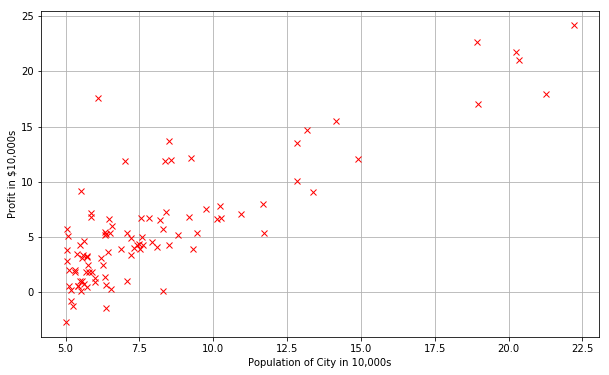

In [5]:
def plot_ori_data(X_ori, y_ori, method=0):
    plt.figure(figsize=(10,6))
    if method == 0:
        plt.plot(X_ori, y_ori, "rx", markersize=6)
    elif method == 1:
        plt.scatter(X_ori, y_ori, s=30, c='r', marker='x', lw=1)
    plt.grid()

plot_ori_data(X_ori, y_ori)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

## Linear Regression

### Hypothesis

+ $ h_{\theta}(x) = \theta^{T}x$
> + theta - (n+1, )
> + X - (m, n+1)
> + (m,)

In [6]:
def hypothesis(theta, X):
    hyp = X @ theta    # np.dot(X, theta)
    return hyp

### Cost Function

+ $J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$
> + theta - (n+1, )
> + X - (m, n+1)
> + y - (m, )
> + scalars

In [7]:
def cost_function(theta, X, y, method=0):
    global J_history
    
    err = hypothesis(theta, X) - y    # (m, )
    
    if method == 0:
        sum_err = err.T @ err
        cost = sum_err / (2 * m)
    elif method == 1:
        sum_err = np.sum(np.square(err))
        cost = sum_err / (2 * m)
    elif method == 2:
        cost = np.mean(np.square(err)) / 2
    
    J_history.append(cost)
    
    return cost


J_history = []
for i in range(3):
    theta = np.zeros((X_train.shape[1],))
    J_history = []
    cost = cost_function(theta, X_train, y_train, i)
    print("Cost : %.3f" % cost)

Cost : 32.073
Cost : 32.073
Cost : 32.073


### Gradient

+ Normal : $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$ 
+ Vector : $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)$$
+ $ {{\theta }_{j}}:={{\theta }_{j}} - {{a} * {Gradient}} $
+ $ {Gradient} = \frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{j}^{(i)}}$
> + theta - (n+1, )
> + X - (m, n+1)
> + y - (m, )
> + (n+1, )

In [8]:
def gradient(theta, X, y):
    err = hypothesis(theta, X) - y
    grad = (X.T @ err) / m
        
    return grad

### Optimize

#### Scipy

In [9]:
def scipy_optimizer(theta, X, y, Method):
    res = opt.minimize(
        fun    = cost_function,
        x0     = theta,
        args   = (X, y),
        method = Method,
        jac    = gradient
    )
    
    return {
        "theta" : res.x,
        "cost_history" : J_history.copy()
    }

In [10]:
optimizer_dict = {
    "BFGS" : "BFGS",
    "TNC"  : "TNC"
}

results_scipy = []
for name in optimizer_dict:
    J_history = []
    theta = np.zeros((X_train.shape[1],))
    res = scipy_optimizer(theta, X_train, y_train, optimizer_dict[name])
    res['name'] = name
    results_scipy.append(res)

In [11]:
for res in results_scipy:
    print("Method %s" % res['name'])    
    print("> theta", ' '.join('%.3f' % i for i in res['theta']), '\n')
    #print("> cost_history\n", ' '.join('%.3f' % i for i in res['cost_history']), "\n")

Method BFGS
> theta -3.896 1.193 

Method TNC
> theta -3.896 1.193 



#### Sklearn

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
print("> model.intercept_", model.intercept_)
print("> model.coef_", model.coef_)

X_test = np.array([[1, 3.5],[1, 7]])
print("Sklearn Predict :", model.predict(X_test))

> model.intercept_ 0.0
> model.coef_ [-3.89578088  1.19303364]
Sklearn Predict : [0.27983688 4.45545463]


#### Batch Gradient Descent

+ $ {{\theta }_{j}}:={{\theta }_{j}} - {{a} * {Gradient}} $

In [13]:
def batch_gradient_descent(theta, X, y, lr=0.01, iterations=1500):
    global J_history
    J_history = []
    theta_history = []
    cost_function(theta, X, y)
    theta_history.append(list(theta))
    
    for _ in range(iterations):
        cost_function(theta, X, y)
        grad = gradient(theta, X, y)
        theta = theta - lr * grad
        theta_history.append(list(theta))
    
    return {
        "lr":lr,
        "iterations":iterations,
        "theta":theta,
        "cost_history":J_history.copy(),
        "theta_history":theta_history#.copy()
    }

In [14]:
#theta_history = []
theta = np.zeros((X_train.shape[1],))
results_batch_GD = []
res = batch_gradient_descent(theta, X_train, y_train)
results_batch_GD.append(res)
print("result_dict :\n\t", results_batch_GD[0].keys())
print("Batch Gradient Descent Theta :\n\t", results_batch_GD[0]["theta"])

result_dict :
	 dict_keys(['lr', 'iterations', 'theta', 'cost_history', 'theta_history'])
Batch Gradient Descent Theta :
	 [-3.63029144  1.16636235]



## Plot Convergence Curves

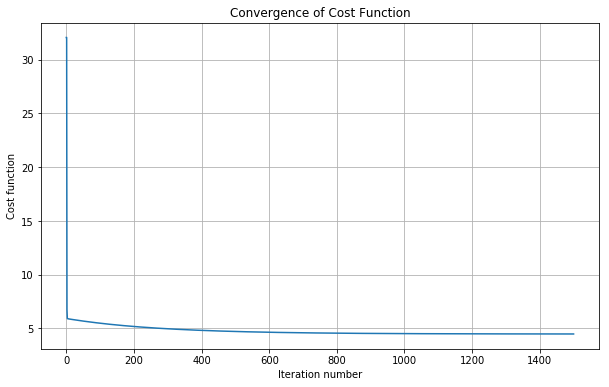

In [15]:
def plot_convergenct_curve(j_history):
    plt.figure(figsize=(10,6))
    plt.plot(np.arange(len(j_history)), j_history)
    #plt.scatter(np.arange(len(j_history)), j_history)
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    
plot_convergenct_curve(results_batch_GD[0]["cost_history"])
#plot_convergenct_curve(results_scipy[0]["cost_history"])
#plot_convergenct_curve(results_scipy[1]["cost_history"])

## Plot Fit Curve

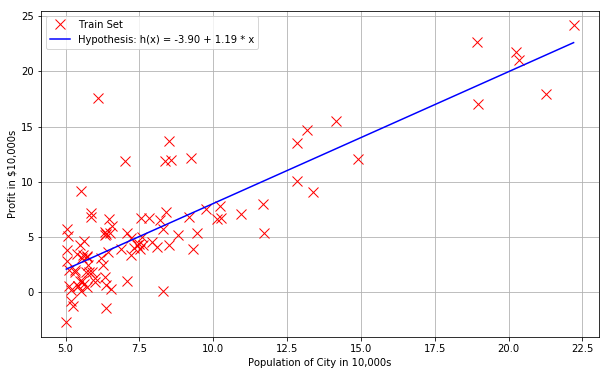

In [16]:
def plot_fit_curve(predict_x, predict_y, theta):
    plt.figure(figsize=(10,6))
    plt.plot(X_ori, y_ori, 'rx', markersize=10, label='Train Set')
    plt.plot(predict_x, predict_y, 'b-', label='Hypothesis: h(x) = %0.2f + %0.2f * x' % (theta[0], theta[1]))
    plt.grid(True)
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population of City in 10,000s')
    plt.legend()
    plt.show()

method = 3
if method == 0:
    predict_x = np.linspace(X_train[:,1].min(), X_train[:,1].max(), 100).reshape((-1,1))
    predict_x = np.insert(predict_x, 0, 1, axis=1)
    theta = results_scipy[0]['theta']
    predict_y = hypothesis(theta, predict_x)
    plot_fit_curve(predict_x[:,1], predict_y, theta)
elif method == 1:
    theta = results_scipy[0]['theta']
    predict = hypothesis(theta, X_train)
    plot_fit_curve(X_ori, predict, theta)
elif method == 2:
    theta = model.coef_
    predict = model.predict(X_train)
    plot_fit_curve(X_train[:,1], predict, theta)
elif method == 3:
    theta = model.coef_
    predict_x = np.linspace(X_train[:,1].min(), X_train[:,1].max(), 100).reshape((-1,1))
    predict_x = np.insert(predict_x, 0, 1, axis=1)
    predict = model.predict(predict_x)
    plot_fit_curve(predict_x[:,1], predict, theta)

## Visualizing _J($\theta$)_

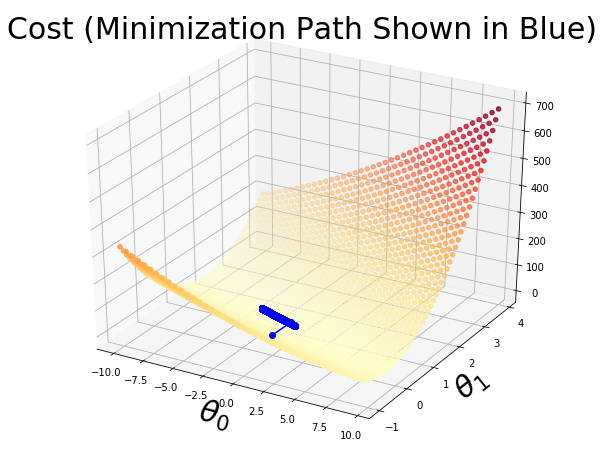

In [17]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for david in xvals:
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        theta = np.array([[david],[kaleko]]).reshape(-1,)
        myzs.append(cost_function(theta, X_train, y_train))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
plt.plot([x[0] for x in results_batch_GD[0]["theta_history"]],[x[1] for x in results_batch_GD[0]["theta_history"]], results_batch_GD[0]["cost_history"],'bo-')
plt.show()

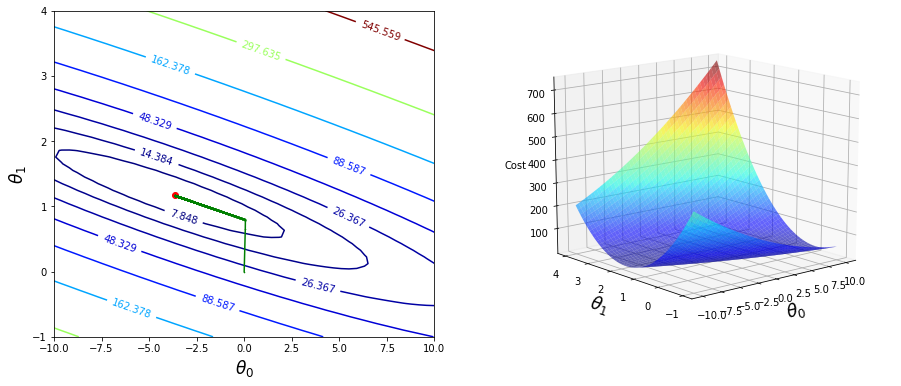

In [18]:
theta0Vals = np.linspace(-10, 10, 50)
theta1Vals = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(theta0Vals, theta1Vals, indexing='xy')
JVals = np.zeros((theta0Vals.size, theta1Vals.size))

for (i,j),v in np.ndenumerate(JVals):
    theta = np.array([[xx[i,j]], [yy[i,j]]]).reshape(-1,)
    JVals[i,j] = cost_function(theta, X_train, y_train)

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

#print(for x in results_batch_GD[0]["theta"])
theta_0 = results_batch_GD[0]["theta"][0]
theta_1 = results_batch_GD[0]["theta"][1]
theta_0_history = [x[0] for x in results_batch_GD[0]["theta_history"]]
theta_1_history = [x[1] for x in results_batch_GD[0]["theta_history"]]

# Left plot
CS = ax1.contour(xx, yy, JVals, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.clabel(CS, inline=1, fontsize=10)
ax1.scatter(theta_0, theta_1, c='r')
ax1.plot(theta_0_history, theta_1_history, 'gx-', markersize=1)

# Right plot
ax2.plot_surface(xx, yy, JVals, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(JVals.min(),JVals.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

In [19]:
num_pts = 50
theta_0_low, theta_0_high = -10, 10
theta_1_low, theta_1_high = -1, 4

theta_0_pts = np.linspace(theta_0_low, theta_0_high, num_pts)
theta_1_pts = np.linspace(theta_1_low, theta_1_high, num_pts)
theta_0_mesh, theta_1_mesh = np.meshgrid(theta_0_pts, theta_1_pts)
theta
cost_mesh = np.array([cost_function(np.array([theta_0, theta_1]), X_train, y_train) for theta_0, theta_1 \
                      in zip(theta_0_mesh.ravel(), theta_1_mesh.ravel())]).reshape(theta_0_mesh.shape)

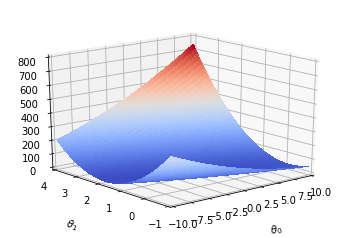

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta_0_mesh, theta_1_mesh, cost_mesh, 
                rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel(r'$\theta_0$', labelpad=15)
ax.set_ylabel(r'$\theta_1$', labelpad=15)
ax.set_zlabel('Cost, ' + r'$J(\theta)$', labelpad=15)
ax.set_xlim(theta_0_low, theta_0_high)
ax.set_ylim(theta_1_low, theta_1_high)
ax.set_zlim(0, 800)
ax.view_init(elev=20., azim=230)
#plt.savefig('ex1a_univariate_plots/fig_3a.png', dpi=300)|

(-1, 4)

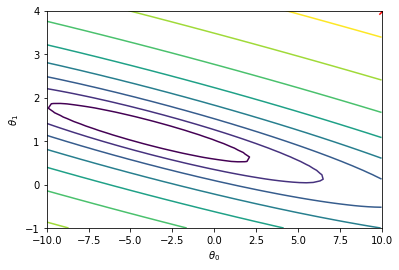

In [21]:
plt.figure()
plt.contour(theta_0_mesh, theta_1_mesh, np.log10(cost_mesh), np.linspace(-2, 3, 20))
plt.scatter(theta[0], theta[1], c='r', marker='x', s=40)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.xlim(theta_0_low, theta_0_high)
plt.ylim(theta_1_low, theta_1_high)
#plt.savefig('ex1a_univariate_plots/fig_3b.png', dpi=300) 

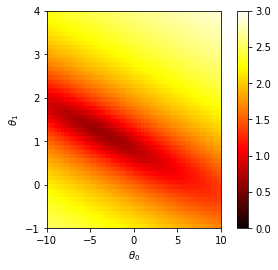

In [22]:
plt.figure()
plt.imshow(np.log10(cost_mesh), extent=[theta_0_low, theta_0_high, theta_1_low, theta_1_high], aspect=5, 
           vmin=0, vmax=3, cmap=plt.get_cmap('hot'), interpolation='nearest', origin='lower')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.colorbar()
#plt.savefig('ex1a_univariate_plots/fig_3_heatmap.png', dpi=300) 

# Linear Regression With Multiple Variables

In [23]:
path = "dataset/ex1data2.txt"
ori_mul_variable = np.loadtxt(path, delimiter=',')
print("> ori_mul_variable.shape", ori_mul_variable.shape)
print("\n> ori_mul_variable[:5]\n", ori_mul_variable[:5])

> ori_mul_variable.shape (47, 3)

> ori_mul_variable[:5]
 [[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]
 [1.416e+03 2.000e+00 2.320e+05]
 [3.000e+03 4.000e+00 5.399e+05]]


In [24]:
X_ori, y_ori, m =  get_ori_X_y(ori_mul_variable)

> X_ori.shape :  (47, 2)
> y_ori.shape :  (47,)
> Sample :  47


## Feature Normalization

In [25]:
mu_train  = 0
std_train = 0
def feature_normalization(X):
    global mu_train, std_train
    
    mu_train = X.mean(axis=0)
    std_train = X.std(axis=0)
    X_norm = (X - mu_train) / std_train
    
    return X_norm

X_norm = feature_normalization(X_ori)

In [26]:
X_train, y_train = form_train_data(X_norm, y_ori)

> X_train.shape (47, 3)
> X_train[:3]
 [[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]]


###### Plot Original and Normal Data

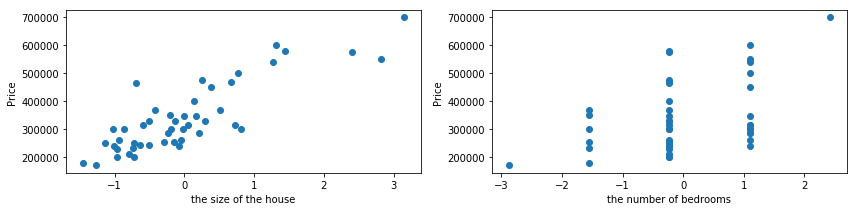

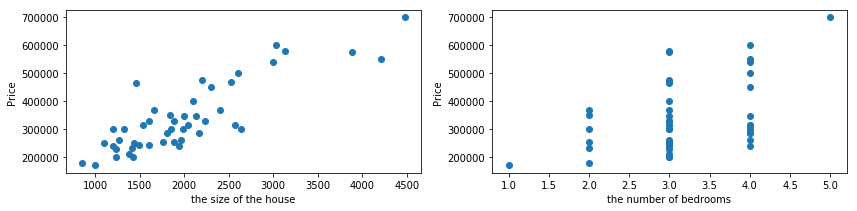

In [27]:
def plot_multi_variable(X, y):
    plt.figure(figsize=(14,3))
    plt.subplot(1,2,1)
    plt.scatter(X[:,0], y_ori)
    plt.ylabel('Price')
    plt.xlabel('the size of the house')

    plt.subplot(1,2,2)
    plt.scatter(X[:,1], y_ori)
    plt.ylabel('Price')
    plt.xlabel('the number of bedrooms')

plot_multi_variable(X_norm, y_ori)
plot_multi_variable(X_ori, y_ori)

###### Optimize - scipy

In [28]:
optimizer_dict = {
    "BFGS" : "BFGS",
    "TNC"  : "TNC"
}

results_scipy = []
for name in optimizer_dict:
    J_history = []
    theta = np.zeros((X_train.shape[1],))
    res = scipy_optimizer(theta, X_train, y_train, optimizer_dict[name])
    res['name'] = name
    results_scipy.append(res)

In [29]:
for res in results_scipy:
    print("Method %s" % res['name'])    
    print("> theta :", ' '.join('%.3f' % i for i in res['theta']), '\n')

Method BFGS
> theta : 340412.660 109447.796 -6578.355 

Method TNC
> theta : 340412.660 109447.796 -6578.355 



###### Optimize - sklearn

In [30]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
print("> model.intercept_", model.intercept_)
print("> model.coef_", model.coef_)

> model.intercept_ 0.0
> model.coef_ [340412.65957447 109447.79646964  -6578.35485416]


###### Optimize - Batch Gradient Descent _ Learning Rate

In [31]:
optimizer_dict = {
    "lr-0.01" : {"lr":0.01, "color":'r'},
    "lr-0.03" : {"lr":0.03, "color":'g'},
    "lr-0.1"  : {"lr":0.1, "color":'k'},
    "lr-0.3"  : {"lr":0.3, "color":'b'},
}

results_batch_GD = []
for name in optimizer_dict:
    theta = np.zeros((X_train.shape[1],))
    res = batch_gradient_descent(theta, X_train, y_train, lr=optimizer_dict[name]["lr"], iterations=100)
    res['color'] = optimizer_dict[name]["color"]
    results_batch_GD.append(res)

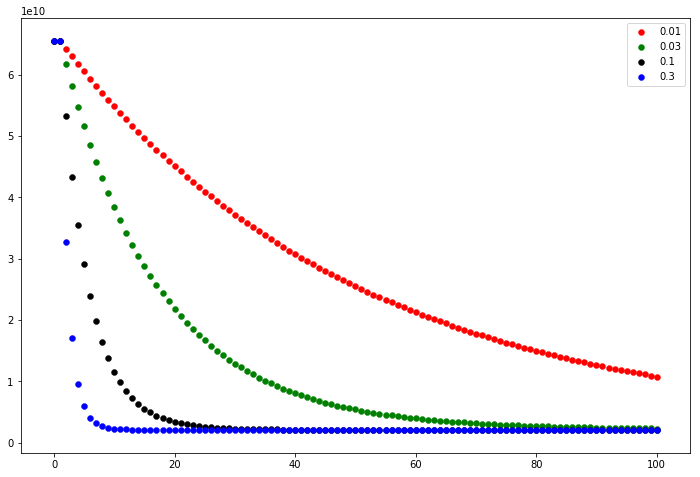

In [32]:
plt.figure(figsize=(12,8))
for res in results_batch_GD:
    iterations = res["iterations"] + 1
    cost_history = res["cost_history"]
    lr = res["lr"]
    plt.scatter(np.arange(iterations), cost_history, c=res['color'], marker='o', label=lr, linewidths=0.4)
    plt.legend()

## Normal Equations

$\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$
> + X - (m, n+1)
> + y - (m, )
###### Remember that while you don't need to scale your features, 
###### we still need to add a columns of 1's to the X matrix to have an intercept term ${{\theta }_{0}}$

In [33]:
def normal_equation(X, y):
    theta = np.linalg.pinv(X.T @ X) @ X.T @ y
    return theta

In [34]:
theta = normal_equation(X_train, y_train)
print("Normal_Equation - theta :", theta)

Normal_Equation - theta : [340412.65957447 109447.79646964  -6578.35485416]


In [35]:
test = np.array([1650, 3])
test = (test - mu_train) / std_train
test = np.insert(test.reshape((1,-1)), 0, 1, axis=1)
predict = np.dot(test, theta)
print("predict", predict)

predict [293081.4643349]
